In [1]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("iris.txt",delimiter=None)
Y = iris[:,-1]    # target value is the last column
X = iris[:,0:-1]  # features are the other columns

In [2]:
# Problem 1(a)
print X.shape[1]      # cols

4


In [3]:
print X.shape[0]      # rows

148


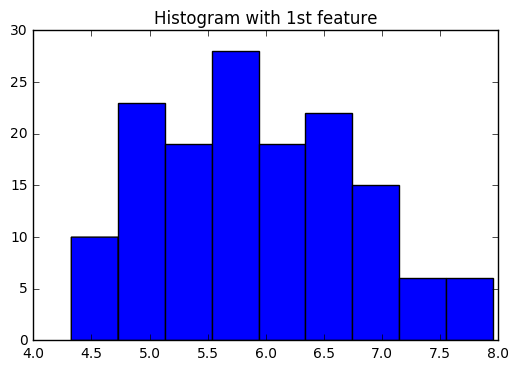

In [4]:
# Problem 1(b)
plt.hist(X[:,0], bins="auto")
plt.title("Histogram with 1st feature")
plt.show()

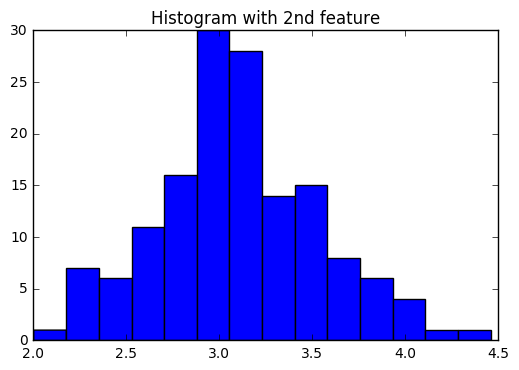

In [5]:
plt.hist(X[:,1], bins="auto")
plt.title("Histogram with 2nd feature")
plt.show()

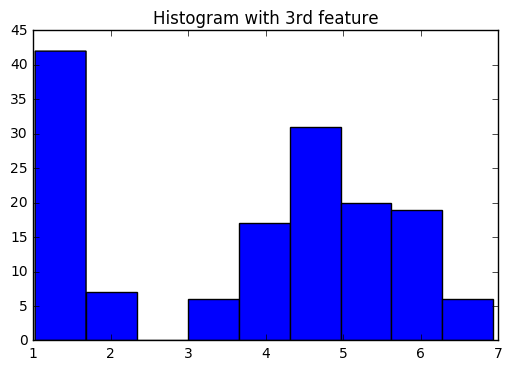

In [6]:
plt.hist(X[:,2], bins="auto")
plt.title("Histogram with 3rd feature")
plt.show()

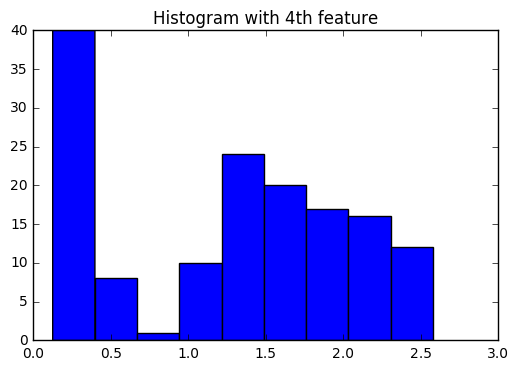

In [7]:
plt.hist(X[:,3], bins="auto")
plt.title("Histogram with 4th feature")
plt.show()

In [8]:
# Problem 1(c)
print np.mean(X[:,0]), " ", np.mean(X[:,1]), " ", np.mean(X[:,2]), " ", np.mean(X[:,3])

5.90010376419   3.09893091689   3.81955484054   1.25255548459


In [9]:
print np.std(X[:,0]), " ", np.std(X[:,1]), " ", np.std(X[:,2]), " ", np.std(X[:,3])

0.833402066775   0.436291838001   1.75405710934   0.758772457026


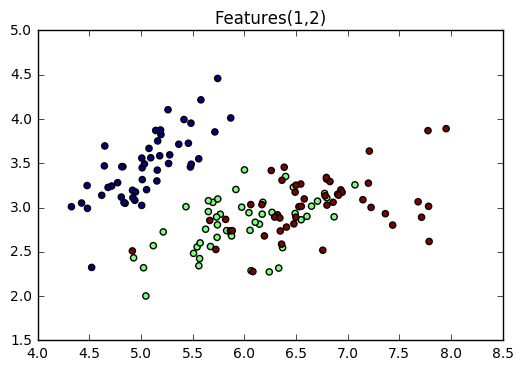

In [10]:
# Problem 1(d)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title("Features(1,2)")
plt.show()

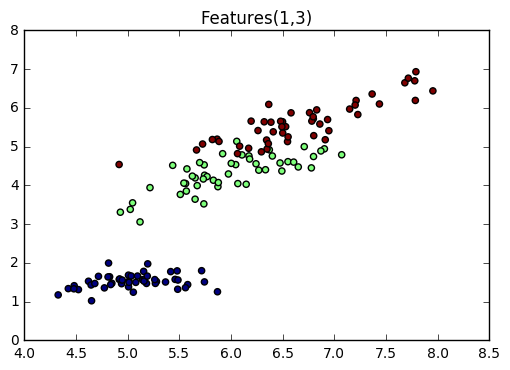

In [11]:
plt.scatter(X[:,0], X[:,2], c=Y)
plt.title("Features(1,3)")
plt.show()

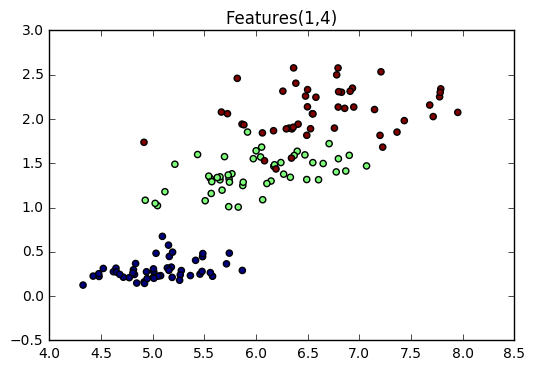

In [12]:
plt.scatter(X[:,0], X[:,3], c=Y)
plt.title("Features(1,4)")
plt.show()

In [13]:
import mltools as ml

In [14]:
# Problem 2(a)
iris = np.genfromtxt("iris.txt",delimiter=None) 
X = iris[:,0:-3]
Y = iris[:,-1]
X,Y = ml.shuffleData(X,Y)
Xtr, Xva, Ytr, Yva = ml.splitData(X,Y, .75)

mltools/utils.py:194: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Xtr,Xte = X[:ne,:], X[ne:,:]
mltools/utils.py:202: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Ytr,Yte = Y[:ne], Y[ne:]


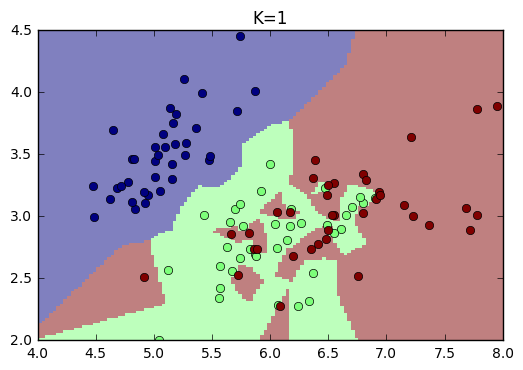

In [15]:
knn = ml.knn.knnClassify() 
knn.train(Xtr,Ytr, 1)
ml.plotClassify2D(knn, Xtr, Ytr)
plt.title("K=1")
plt.show()

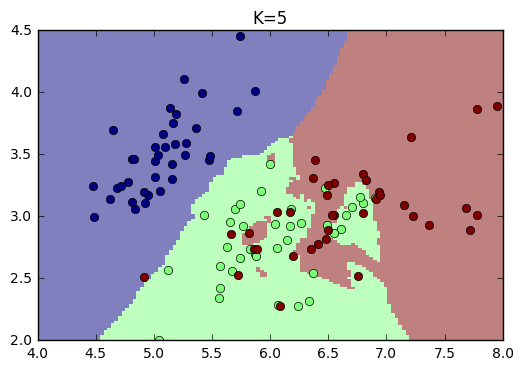

In [16]:
knn.train(Xtr,Ytr, 5)
ml.plotClassify2D(knn, Xtr, Ytr)
plt.title("K=5")
plt.show()

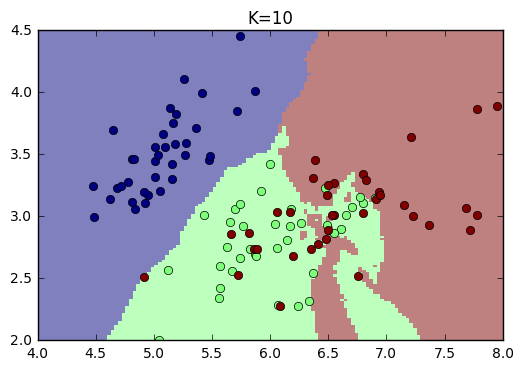

In [17]:
knn.train(Xtr,Ytr, 10)
ml.plotClassify2D(knn, Xtr, Ytr)
plt.title("K=10")
plt.show()

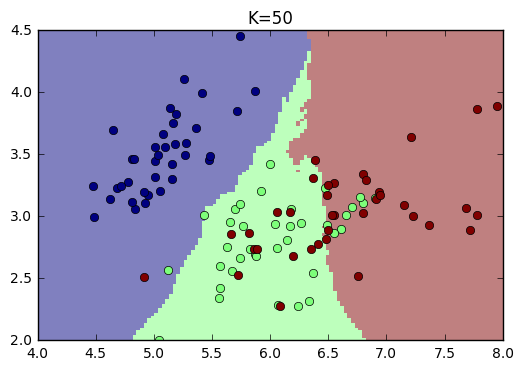

In [18]:
knn.train(Xtr,Ytr, 50)
ml.plotClassify2D(knn, Xtr, Ytr)
plt.title("K=50")
plt.show()

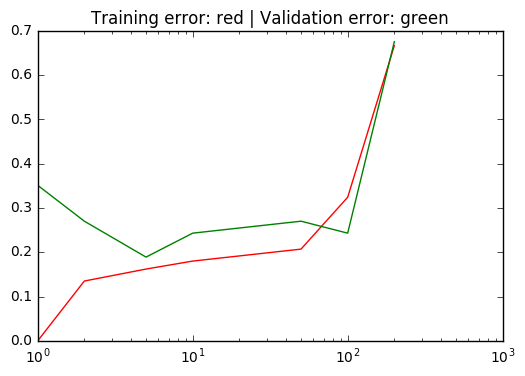

In [19]:
# Problem 2(b)
K = [1,2,5,10,50,100,200]
errTrain = np.zeros(len(K))
errValidate = np.zeros(len(K))
for i, k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr, Ytr, k)
    Yhat = learner.predict(Xva)
    errTrain[i] = learner.err(Xtr, Ytr)
    errValidate[i] = learner.err(Xva, Yva)
    
plt.semilogx(K, errTrain, 'red')
plt.semilogx(K, errValidate, 'green')
plt.title("Training error: red | Validation error: green")

plt.show()